In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Ising model simulations

From:
* 1) [Monte Carlo Simulation of the Ising Model using Python](http://www.thebrokendesk.com/post/monte-carlo-simulation-of-the-ising-model-using-python/): Explanations, code and video
* 2) [Full code](http://www.physics.rutgers.edu/~haule/681/src_MC/python_codes/ising.py) with T infinite. 
* 3) [VPython code](http://physics.weber.edu/thermal/isingVPython.html) with explanations
* 3) [Slides](http://physics.unifr.ch/admin/dbproxy.php?table=fuman_filepool&column=content&id=1267) based on Newman book

## 1)  Monte Carlo Simulation of the Ising Model using Python: Explanations, code and video

In [3]:
import numpy as np
SIZE=5
STEPS=10
#----------------------------------------------------------------------#
#   Check periodic boundary conditions 
#----------------------------------------------------------------------#
def bc(i):
    return i%SIZE

#----------------------------------------------------------------------#
#   Calculate internal energy
#----------------------------------------------------------------------#
def energy(system, N, M):
    return -1 * system[N,M] * (system[bc(N-1), M] 
                               + system[bc(N+1), M] 
                               + system[N, bc(M-1)] 
                               + system[N, bc(M+1)])

#----------------------------------------------------------------------#
#   Build the system
#----------------------------------------------------------------------#
def build_system():
    system = np.random.random_integers(0,1,(SIZE,SIZE))
    system[system==0] =- 1

    return system

#----------------------------------------------------------------------#
#   The Main monte carlo loop
#----------------------------------------------------------------------#
def main(T):
    system = build_system()

    for step, x in enumerate(range(STEPS)): #list(enumerate(range(STEPS)))
        M = np.random.randint(0,SIZE)
        N = np.random.randint(0,SIZE)

        E = -2. * energy(system, N, M)

        if E <= 0.:
            system[N,M] *= -1
        elif np.exp(-1./T*E) > np.random.rand():
            system[N,M] *= -1
        print system

#----------------------------------------------------------------------#
#   Run the menu for the monte carlo simulation
#----------------------------------------------------------------------#
def run():
    print '='*30
    print '\tMonte Carlo Statistics for an ising model with'
    print '\t\tperiodic boundary conditions'
    print '='*30

    print "Choose the temperature for your run (0.1-100)"
    T = float(raw_input())
    main(T)

In [4]:
run()

	Monte Carlo Statistics for an ising model with
		periodic boundary conditions
Choose the temperature for your run (0.1-100)
10
[[-1 -1 -1 -1 -1]
 [ 1  1 -1  1 -1]
 [ 1  1  1  1 -1]
 [ 1  1  1 -1 -1]
 [-1 -1 -1 -1 -1]]
[[-1 -1 -1 -1 -1]
 [ 1  1 -1  1 -1]
 [ 1  1  1  1 -1]
 [ 1  1  1 -1 -1]
 [ 1 -1 -1 -1 -1]]
[[-1 -1 -1 -1 -1]
 [ 1  1 -1  1 -1]
 [ 1  1  1  1 -1]
 [ 1  1  1 -1 -1]
 [ 1 -1 -1 -1 -1]]
[[-1 -1 -1 -1 -1]
 [ 1  1 -1  1 -1]
 [ 1  1  1  1  1]
 [ 1  1  1 -1 -1]
 [ 1 -1 -1 -1 -1]]
[[-1 -1 -1 -1 -1]
 [ 1  1 -1  1 -1]
 [ 1  1  1  1  1]
 [ 1  1  1 -1 -1]
 [ 1  1 -1 -1 -1]]
[[-1  1 -1 -1 -1]
 [ 1  1 -1  1 -1]
 [ 1  1  1  1  1]
 [ 1  1  1 -1 -1]
 [ 1  1 -1 -1 -1]]
[[-1  1 -1 -1 -1]
 [ 1  1  1  1 -1]
 [ 1  1  1  1  1]
 [ 1  1  1 -1 -1]
 [ 1  1 -1 -1 -1]]
[[ 1  1 -1 -1 -1]
 [ 1  1  1  1 -1]
 [ 1  1  1  1  1]
 [ 1  1  1 -1 -1]
 [ 1  1 -1 -1 -1]]
[[ 1 -1 -1 -1 -1]
 [ 1  1  1  1 -1]
 [ 1  1  1  1  1]
 [ 1  1  1 -1 -1]
 [ 1  1 -1 -1 -1]]
[[ 1 -1 -1 -1 -1]
 [ 1  1  1  1 -1]
 [ 1  1  1  1  1]

## 2)

4.0 -0.000378416257884 -0.55766142757 0.173422621726 1.07515209127
3.96464646465 -0.00934828311142 -0.558490339373 0.180777568461 1.1013455304
3.92929292929 0.00279707678446 -0.569642606868 0.180832006574 1.12308366756
3.89393939394 0.00332565822405 -0.576930623686 0.182996922039 1.16996956683
3.85858585859 -0.00556812493743 -0.580186204825 0.19313967117 1.18307604827
3.82323232323 0.00341375513064 -0.595835418961 0.193739496227 1.27746051711
3.78787878788 -0.00851336470117 -0.597601361498 0.197075175825 1.30458345575
3.75252525253 0.00442486735409 -0.604705175693 0.201906826026 1.36379672729
3.71717171717 -0.000352387626389 -0.610399439383 0.212404702417 1.37692904586
3.68181818182 0.0175573130443 -0.617343077385 0.222611546795 1.36437636532
3.64646464646 -0.000462508759636 -0.62835519071 0.223602869085 1.47866447158
3.61111111111 -0.000496546200821 -0.634473921313 0.231500744044 1.53981522265
3.57575757576 -0.0201461607769 -0.639018920813 0.238072438808 1.58699686248
3.5404040404 -0.

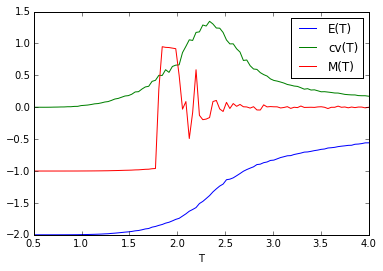

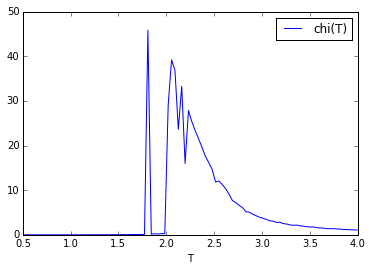

In [3]:
#!/usr/bin/env python
"""
Monte Carlo simulation of the 2D Ising model
"""

from scipy import *
from scipy import weave
from pylab import *

Nitt = 1000000  # total number of Monte Carlo steps
N = 10          # linear dimension of the lattice, lattice-size= N x N
warm = 1000     # Number of warmup steps
measure=100     # How often to take a measurement


def CEnergy(latt):
    "Energy of a 2D Ising lattice at particular configuration"
    Ene = 0
    for i in range(len(latt)):
        for j in range(len(latt)):
            S = latt[i,j]
            WF = latt[(i+1)%N, j] + latt[i,(j+1)%N] + latt[(i-1)%N,j] + latt[i,(j-1)%N]
            Ene += -WF*S # Each neighbor gives energy 1.0
    return Ene/2. # Each par counted twice

def RandomL(N):
    "Radom lattice, corresponding to infinite temerature"
    latt = zeros((N,N), dtype=int)
    for i in range(N):
        for j in range(N):
            latt[i,j] = sign(2*rand()-1)
    return latt

def SamplePython(Nitt, latt, PW):
    "Monte Carlo sampling for the Ising model in Pythons"
    Ene = CEnergy(latt)  # Starting energy
    Mn=sum(latt)         # Starting magnetization
    
    Naver=0       # Measurements
    Eaver=0.0
    Maver=0.0
    
    N2 = N*N
    for itt in range(Nitt):
        t = int(rand()*N2)
        (i,j) = (t % N, t/N)
        S = latt[i,j]
        WF = latt[(i+1)%N, j] + latt[i,(j+1)%N] + latt[(i-1)%N,j] + latt[i,(j-1)%N]
        P = PW[4+S*WF]
        if P>rand(): # flip the spin
            latt[i,j] = -S
            Ene += 2*S*WF
            Mn -= 2*S
            
        if itt>warm and itt%measure==0:
            Naver += 1
            Eaver += Ene
            Maver += Mn

    return (Maver/Naver, Eaver/Naver)


def SampleCPP(Nitt, latt, PW, T):
    "The same Monte Carlo sampling in C++"
    Ene = float(CEnergy(latt))  # Starting energy
    Mn = float(sum(latt))       # Starting magnetization

    # Measurements
    aver = zeros(5,dtype=float) # contains: [Naver, Eaver, Maver]
    
    code="""
    using namespace std;
    int N2 = N*N;
    for (int itt=0; itt<Nitt; itt++){
        int t = static_cast<int>(drand48()*N2);
        int i = t % N;
        int j = t / N;
        int S = latt(i,j);
        int WF = latt((i+1)%N, j) + latt(i,(j+1)%N) + latt((i-1+N)%N,j) + latt(i,(j-1+N)%N);
        double P = PW(4+S*WF);
        if (P > drand48()){ // flip the spin
            latt(i,j) = -S;
            Ene += 2*S*WF;
            Mn -= 2*S;
        }
        if (itt>warm && itt%measure==0){
            aver(0) += 1;
            aver(1) += Ene;
            aver(2) += Mn;
            aver(3) += Ene*Ene;
            aver(4) += Mn*Mn;
        }
    }
    """
    weave.inline(code, ['Nitt','latt','N','PW','Ene','Mn','warm', 'measure', 'aver'],
                 type_converters=weave.converters.blitz, compiler = 'gcc')
    aE = aver[1]/aver[0]
    aM = aver[2]/aver[0]
    cv = (aver[3]/aver[0]-(aver[1]/aver[0])**2)/T**2
    chi = (aver[4]/aver[0]-(aver[2]/aver[0])**2)/T
    return (aM, aE, cv, chi)


if __name__ == '__main__':
    
    latt = RandomL(N)
    PW = zeros(9, dtype=float)

    wT = linspace(4,0.5,100)
    wMag=[]
    wEne=[]
    wCv=[]
    wChi=[]
    for T in wT:
        
        # Precomputed exponents
        PW[4+4] = exp(-4.*2/T)
        PW[4+2] = exp(-2.*2/T)
        PW[4+0] = exp(0.*2/T)
        PW[4-2] = exp( 2.*2/T)
        PW[4-4] = exp( 4.*2/T)
    
        #(maver, eaver) = SamplePython(Nitt, latt, PW)
        (aM, aE, cv, chi) = SampleCPP(Nitt, latt, PW, T)
        wMag.append( aM/(N*N) )
        wEne.append( aE/(N*N) )
        wCv.append( cv/(N*N) )
        wChi.append( chi/(N*N) )
        
        print T, aM/(N*N), aE/(N*N), cv/(N*N), chi/(N*N)
        
    plot(wT, wEne, label='E(T)')
    plot(wT, wCv, label='cv(T)')
    plot(wT, wMag, label='M(T)')
    xlabel('T')
    legend(loc='best')
    show()
    plot(wT, wChi, label='chi(T)')
    xlabel('T')
    legend(loc='best')
    show()

In [11]:
STEPS=5
list(enumerate(range(STEPS)))

[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4)]

In [10]:
a.next()

(2, 2)